## Install packages

In [1]:
!pip install burst_detection

  Created wheel for burst-detection: filename=burst_detection-0.1.3-py3-none-any.whl size=4849 sha256=e36cabf21ec209e8d6f7111fe0a198f27adb8504507540545633f9e21d732057
  Stored in directory: /root/.cache/pip/wheels/ba/48/fd/abb43e97d8ecd07375d7ab31278105fe26a963fcf6e289490f
Successfully built burst-detection


## Import libraries

In [31]:
import pandas as pd
import burst_detection as bd
import numpy as np
from datetime import datetime
import re
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
nltk.download('stopwords')
import scipy.stats as stats

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load and concatenate datasets

In [4]:
data1 = pd.read_csv('covid_tweets_01.csv')
data2 = pd.read_csv('covid_tweets_02.csv')
data3 = pd.read_csv('covid_tweets_03.csv')
data4 = pd.read_csv('covid_tweets_04.csv')
data5 = pd.read_csv('covid_tweets_05.csv')
data6 = pd.read_csv('covid_tweets_06.csv')
data7 = pd.read_csv('covid_tweets_07.csv')
data8 = pd.read_csv('covid_tweets_08.csv')
data9 = pd.read_csv('covid_tweets_09.csv')
data10 = pd.read_csv('covid_tweets_10.csv')
data11 = pd.read_csv('covid_tweets_11.csv')
data12 = pd.read_csv('covid_tweets_12.csv')
data13 = pd.read_csv('covid_tweets_13.csv')
data14 = pd.read_csv('covid_tweets_14.csv')
data15 = pd.read_csv('covid_tweets_15.csv')
data16 = pd.read_csv('covid_tweets_16.csv')
data17 = pd.read_csv('covid_tweets_17.csv')
data18 = pd.read_csv('covid_tweets_18.csv')
data19 = pd.read_csv('covid_tweets_19.csv')
data20 = pd.read_csv('covid_tweets_20.csv')
data21 = pd.read_csv('covid_tweets_21.csv')
data22 = pd.read_csv('covid_tweets_22.csv')
data23 = pd.read_csv('covid_tweets_23.csv')
data24 = pd.read_csv('covid_tweets_24.csv')
data25 = pd.read_csv('covid_tweets_25.csv')
data26 = pd.read_csv('covid_tweets_26.csv')
data27 = pd.read_csv('covid_tweets_27.csv')
data28 = pd.read_csv('covid_tweets_28.csv')
data29 = pd.read_csv('covid_tweets_29.csv')
data30 = pd.read_csv('covid_tweets_30.csv')
data31 = pd.read_csv('covid_tweets_31.csv')

frames = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15,
          data16, data17, data18, data19, data20, data21, data22, data23, data24, data25, data26, data27, data28, data29,
          data30, data31]

df = pd.concat(frames)

In [5]:
# numbers of observations in the dataset
df.shape

(245468, 13)

In [6]:
# display the dataset
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,BubbyTCat,Ontario,"Speak out, silence can be deadly, especially 4...",2010-04-24 22:44:30,115,89,14336,False,2022-01-01 23:59:58,3rd of the way through. A recap of #covid hist...,['covid'],Twitter Web App,False
1,Brett Lee,NaN,Critical thinker. God Fearing Happy Husband. ...,2009-02-26 00:21:01,4,97,175,False,2022-01-01 23:59:04,"@Florida51491495 Sad, we have a problem gettin...",['covid'],Twitter Web App,False
2,Geoff Pan,"Madison, WI",Hungry & Thirsty | Ex-scientist | Non-profit D...,2008-10-31 13:33:10,701,1202,21790,False,2022-01-01 23:58:45,What’s wilder than all the TDs in this #RoseBo...,"['RoseBowl', 'COVID']",Twitter for iPhone,False
3,Shalom aleichem,"Phoenix,AZ",I am the daughter to the most amazing mother b...,2021-12-16 04:56:26,2,34,4,False,2022-01-01 23:58:20,As a healthcare worker I hear people saying ho...,NaN,Twitter for iPhone,False
4,Rhianwyn,Pimlico/ London,See the red arrow? Top of my head! 1992 vintag...,2017-02-15 19:14:29,674,706,27388,False,2022-01-01 23:57:02,"Are You Listening, Yet?\n\n""Omicron is 'Less S...",NaN,Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5504,демон,NaN,It is difficult to free fools from the chains ...,2019-11-10 03:50:10,79,152,7165,False,2022-01-31 00:01:02,Meanwhile in #Mexico\n #COVID19 #Ivermectin #C...,"['Mexico', 'COVID19', 'Ivermectin', 'COVID', '...",Twitter for iPhone,False
5505,Gifted Te Ngaengae,Naenae.,Tangata Tiriti. She/her. My views are my own. ...,2011-08-28 04:27:18,438,1013,8495,False,2022-01-31 00:00:37,Many many people at Days Bay’s Pavillion yeste...,NaN,Twitter for iPhone,False
5506,Charley,North Carolina Proud,"#Resistance. Life Long Democrat, Intelligent,...",2012-12-03 19:42:46,1210,1181,76710,False,2022-01-31 00:00:28,#GOP Wishing away #Covid doesn't work.\nGet #V...,"['GOP', 'Covid', 'Vaxed', 'Mask', 'Vigilante',...",Twitter Web App,False
5507,Institute for a Progressive Nevada,"Nevada, USA",Institute for a Progressive Nevada educates an...,2018-10-23 19:03:08,256,83,401,False,2022-01-31 00:00:06,As #COVID hospitalizations among predominantly...,['COVID'],Meltwater Social,False


In [7]:
# drop unnecessary columns
df = df.drop(columns = ['user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 
                    'user_favourites', 'user_verified', 'hashtags', 'source', 'is_retweet'])


## Perform text preprocessing

### Remove punctuation

In [8]:
# Removing punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Tweets to lowercase

In [9]:
# tweets to lowercase, remove text in square brackets, remove url, remove punctuation and words containing numbers using regular expressions
tweets = df["text"]
def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?:\/\/\S+', '', text)                         # URL links removal 
    text = re.sub(r"www\.[a-z]?\?.?(com) + [a-z]+\.(com)", '', text)   # URL links removal with regular expression like 'expression.com'
    text = re.sub(r'{link}', '', text)                                 # removal of replaced link by the this word (link)
    text = re.sub(r"\[video]", '', text)                               # removal of replaced link by video  
    text = re.sub(r'&[a-z]+;', '', text)                               # HTML reference character removal (punctuation)
    text = re.sub(r"[^a-z\s\(\-:\)\\\/\];='#']", '', text)             # non letter characters
    text = re.sub(r'@', '', text)                                      # remove mention
    return text
clean_tweets = tweets.apply(clean_text)
clean_tweets.head(10)

0    rd of the way through a recap of #covid histor...
1    florida sad we have a problem getting citizens...
2    whats wilder than all the tds in this #rosebow...
3    as a healthcare worker i hear people saying ho...
4    are you listening yet\n\nomicron is 'less seve...
5    if you believe in #vaccinemandates for an expe...
6    just found out my friend's husband is in the i...
7    name and shame -\n\nrana ayyub ranaayyub cheat...
8    -year-old possibly died in community first #ch...
9    excellent article on #covid et al\nits irratio...
Name: text, dtype: object

### Tokenization

In [10]:
# Tokenization
def tokenize(text):
  text = re.split('\W+', text)
  return text

tweets_token = clean_tweets.apply(lambda x: tokenize(x.lower()))
tweets_token.head()

# https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis

0    [rd, of, the, way, through, a, recap, of, covi...
1    [florida, sad, we, have, a, problem, getting, ...
2    [whats, wilder, than, all, the, tds, in, this,...
3    [as, a, healthcare, worker, i, hear, people, s...
4    [are, you, listening, yet, omicron, is, less, ...
Name: text, dtype: object

### Stopwords removal

In [11]:
# Stopwords Removal
nltk.download('stopwords')

stopword = stopwords.words('english')
more_stopwords = ["u", "im", "c", "amp", "quot", "r", "I", "team", "county", "omicron", "Omicron", "covid", "Covid", "covid19", "Covid19",
                  "The", "day", "today", "go", "k", "Us", "us", ""]
stop_words = stopword + more_stopwords

def stopwords_removal(text):
  text = [word for word in text if word not in stop_words]
  return text

tweets_nostop = tweets_token.apply(lambda x: stopwords_removal(x))
tweets_nostop.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [rd, way, recap, history, great, nice, watch, ...
1    [florida, sad, problem, getting, citizens, vot...
2    [whats, wilder, tds, rosebowl, game, maskless,...
3    [healthcare, worker, hear, people, saying, goo...
4    [listening, yet, less, severe, causes, less, l...
Name: text, dtype: object

## Display the final dataset

### Add cleaned tweets to the main dataframe

In [12]:
# Add cleaned tweets to the main dataframe
df["final_tweets"] = tweets_nostop
df.head()

,date,text,final_tweets
0,2022-01-01 23:59:58,3rd of the way through. A recap of #covid hist...,"[rd, way, recap, history, great, nice, watch, ..."
1,2022-01-01 23:59:04,"@Florida51491495 Sad, we have a problem gettin...","[florida, sad, problem, getting, citizens, vot..."
2,2022-01-01 23:58:45,What’s wilder than all the TDs in this #RoseBo...,"[whats, wilder, tds, rosebowl, game, maskless,..."
3,2022-01-01 23:58:20,As a healthcare worker I hear people saying ho...,"[healthcare, worker, hear, people, saying, goo..."
4,2022-01-01 23:57:02,"Are You Listening, Yet?\n\n""Omicron is 'Less S...","[listening, yet, less, severe, causes, less, l..."


### Select important columns and display the final dataset

In [13]:
# select the most important columns and display the final dataset
final_df = df[['date', 'final_tweets']]
final_df.head()

,date,final_tweets
0,2022-01-01 23:59:58,"[rd, way, recap, history, great, nice, watch, ..."
1,2022-01-01 23:59:04,"[florida, sad, problem, getting, citizens, vot..."
2,2022-01-01 23:58:45,"[whats, wilder, tds, rosebowl, game, maskless,..."
3,2022-01-01 23:58:20,"[healthcare, worker, hear, people, saying, goo..."
4,2022-01-01 23:57:02,"[listening, yet, less, severe, causes, less, l..."


### Convert the date column into three columns month, day and time

In [14]:
# convert the date column into month, day and time
final_df['Dates'] = pd.to_datetime(final_df['date']).dt.date
final_df['Time'] = pd.to_datetime(final_df['date']).dt.time

In [15]:
final_df.head()

,date,final_tweets,Dates,Time
0,2022-01-01 23:59:58,"[rd, way, recap, history, great, nice, watch, ...",2022-01-01,23:59:58
1,2022-01-01 23:59:04,"[florida, sad, problem, getting, citizens, vot...",2022-01-01,23:59:04
2,2022-01-01 23:58:45,"[whats, wilder, tds, rosebowl, game, maskless,...",2022-01-01,23:58:45
3,2022-01-01 23:58:20,"[healthcare, worker, hear, people, saying, goo...",2022-01-01,23:58:20
4,2022-01-01 23:57:02,"[listening, yet, less, severe, causes, less, l...",2022-01-01,23:57:02


In [16]:
final_df['Year'] = final_df['Dates'].apply(lambda x: x.year)
final_df['month'] = final_df['Dates'].apply(lambda x: x.month)
final_df['day'] = final_df['Dates'].apply(lambda x: x.day)

### Display the final dataset

In [17]:
final_df

,date,final_tweets,Dates,Time,Year,month,day
0,2022-01-01 23:59:58,"[rd, way, recap, history, great, nice, watch, ...",2022-01-01,23:59:58,2022,1,1
1,2022-01-01 23:59:04,"[florida, sad, problem, getting, citizens, vot...",2022-01-01,23:59:04,2022,1,1
2,2022-01-01 23:58:45,"[whats, wilder, tds, rosebowl, game, maskless,...",2022-01-01,23:58:45,2022,1,1
3,2022-01-01 23:58:20,"[healthcare, worker, hear, people, saying, goo...",2022-01-01,23:58:20,2022,1,1
4,2022-01-01 23:57:02,"[listening, yet, less, severe, causes, less, l...",2022-01-01,23:57:02,2022,1,1
...,...,...,...,...,...,...,...
5504,2022-01-31 00:01:02,"[meanwhile, mexico, ivermectin, coronaupdate, ...",2022-01-31,00:01:02,2022,1,31
5505,2022-01-31 00:00:37,"[many, many, people, days, bays, pavillion, ye...",2022-01-31,00:00:37,2022,1,31
5506,2022-01-31 00:00:28,"[gop, wishing, away, work, get, vaxed, wear, m...",2022-01-31,00:00:28,2022,1,31
5507,2022-01-31 00:00:06,"[hospitalizations, among, predominantly, unvac...",2022-01-31,00:00:06,2022,1,31


## Create a word counts dataframe and plot the most common words

### Word counts list

In [18]:
#remove words that appear fewer than X times
word_counts = Counter(final_df['final_tweets'].apply(pd.Series).stack())

unique_words = list(word_counts)

In [19]:
unique_words[:5]

['rd', 'way', 'recap', 'history', 'great']

### Flat list

In [20]:
flat_list = []
for sublist in tweets_nostop:
  for item in sublist:
    flat_list.append(item)
flat_list[:5]

['rd', 'way', 'recap', 'history', 'great']

### Most common words per frequences

In [21]:
# create a word counts dataframe and plot the most common words
words_counts = Counter(flat_list).most_common(50)
words_df = pd.DataFrame(words_counts)
words_df.columns = ["words","frq"]
display(words_df.head(10))

px.bar(words_df, x = "words", y = "frq", title = "Most common words")

# https://www.kaggle.com/chenxidong/sentiment-analysis-and-word-cloud

,words,frq
0,analytics,31851
1,health,29511
2,cases,29025
3,people,21148
4,data,20147
5,new,19324
6,vaccine,17162
7,get,16802
8,publichealth,16662
9,insights,16069


Word cloud

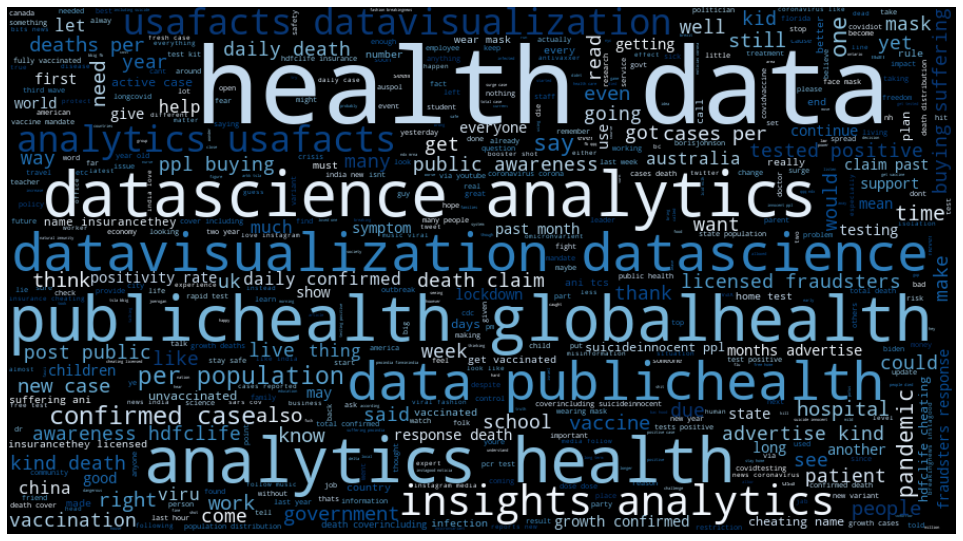

In [22]:
# Word Cloud of top words in final tweets
from wordcloud import WordCloud
text = " ".join(flat_list)
WC = WordCloud(width = 900,
               height = 500,
               stopwords = set(stop_words),
               max_words = 500,
               max_font_size = 100,
               relative_scaling = 0.5,
               colormap = "Blues",
               random_state=1).generate(text)

fig = plt.figure(1, figsize=(17,14))
plt.axis('off')
fig.subplots_adjust(top=2.3)
plt.imshow(WC, interpolation = "bilinear")
plt.show()

## Define our most common word function

In [24]:
# define our plot_most_common_words function
blog_blue = '#3498DB'
blue_cmap = sns.light_palette(blog_blue, as_cmap = True)

def most_common_words(word_counts, n, title, gradient, label_type):
  word_counts = pd.DataFrame(word_counts.most_common()[:n], columns=['word','count'])

  if gradient:
    bar_colors = blue_cmap((word_counts['count'])/(word_counts['count'].max()))
  else:
    bar_colors = blog_blue

  #create a horizontal bar plot
  plt.barh(range(n,0,-1), word_counts['count'], height=0.85, color=bar_colors, alpha=1)

  #format plot
  sns.despine(left=True,bottom=True)
  plt.ylim(0,n+1)
  plt.title(title)
  plt.grid(axis='x')

  #label bars
  if label_type == 'counts':
    plt.yticks(range(n,0,-1), word_counts['word']);
    for i, row in word_counts.iterrows():
        plt.text(row['count']-100,50-i-0.2, row['count'], horizontalalignment='right', fontsize='12', color='white')

  elif label_type == 'labeled_bars_left':
      plt.yticks(range(n,0,-1), []);
      for i, row in word_counts.iterrows():
          plt.text(50,n-i-0.2, row['word'], horizontalalignment='left', fontsize='14')

  elif label_type == 'labeled_bars_right':
      plt.yticks(range(n,0,-1), []);
      for i, row in word_counts.iterrows():
          plt.text(row['count'],n-i-0.2,row['word'], horizontalalignment='right', fontsize='14')

  else:
      plt.yticks(range(n,0,-1), words_counts['word']);


## Plot the most common words per day

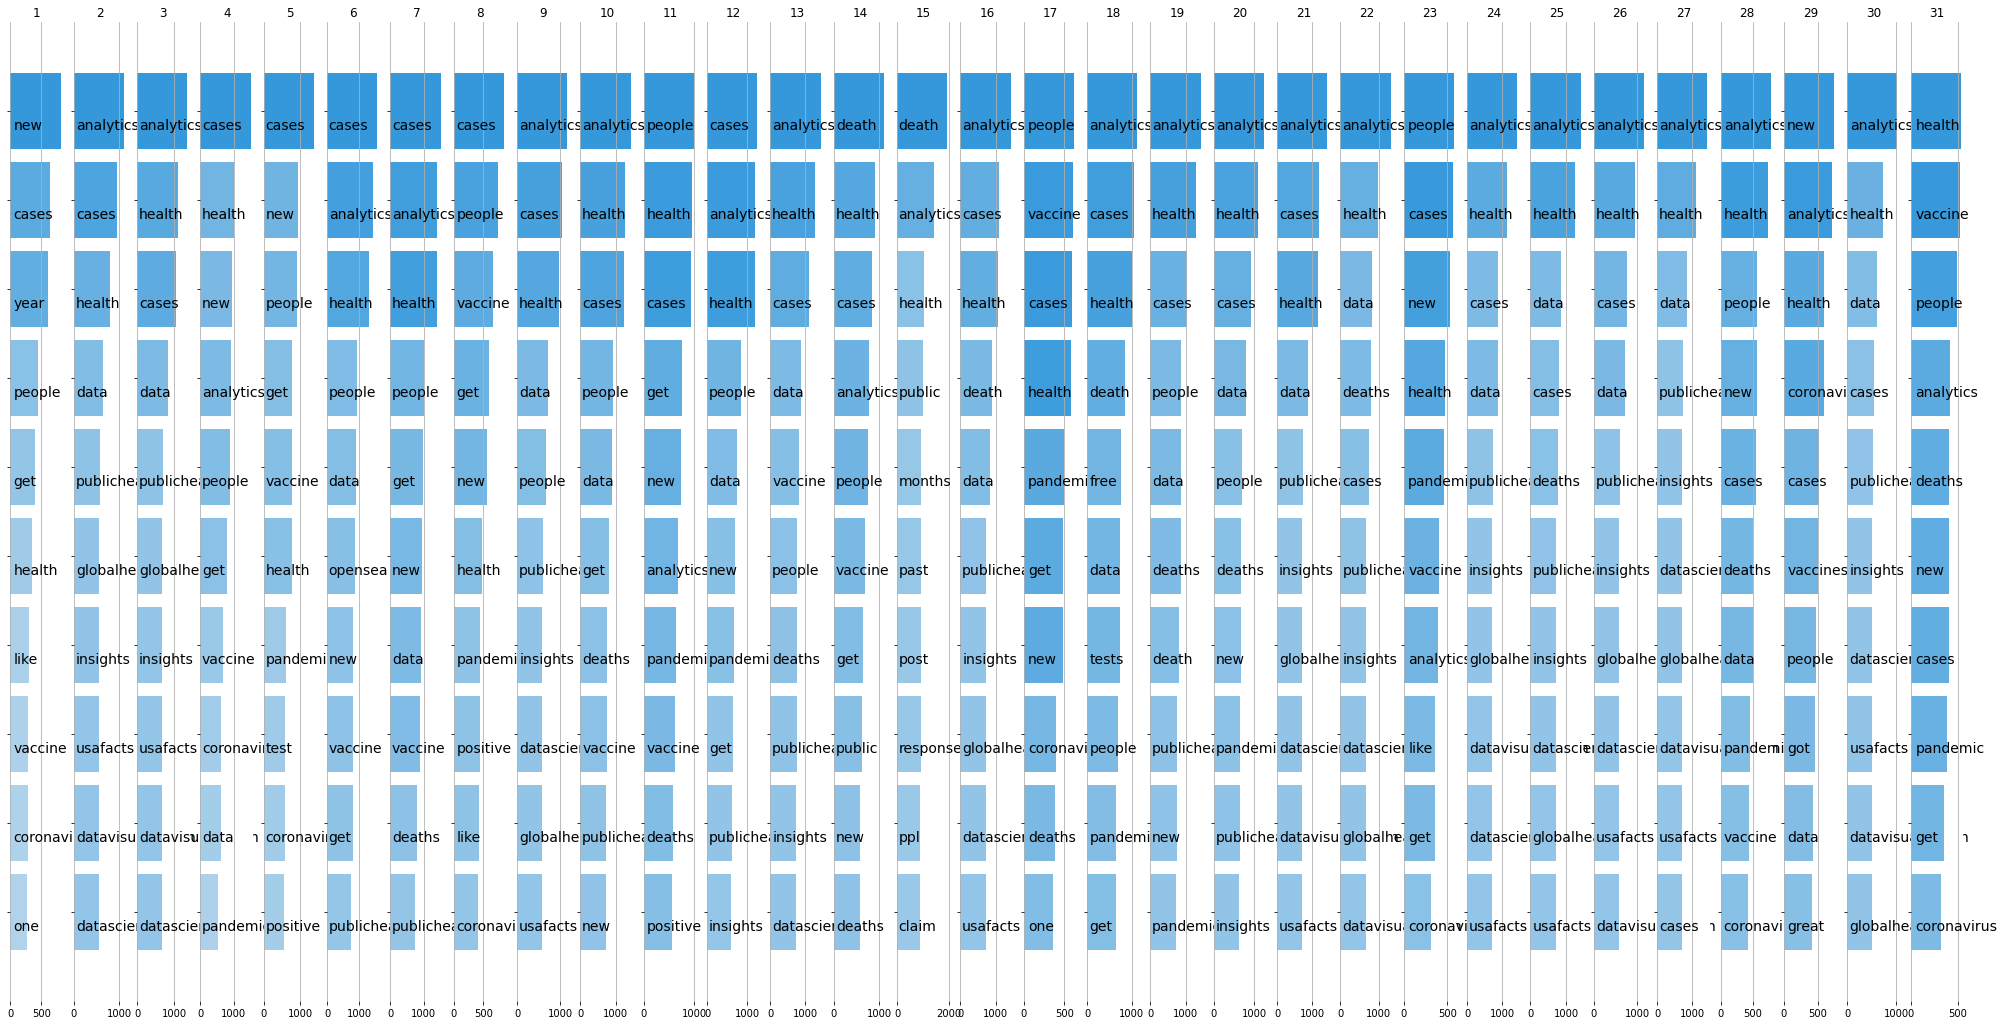

In [57]:
n = 10
start_day = 1

# subplots

fig, axes = plt.subplots(1, 31, figsize = (35,18), sharex = True, sharey = True);

for i, ax in enumerate(axes.flatten()):
  
  plt.subplot(1,31, i+1)

  # count words for the day
  day_word_count = Counter(final_df.loc[final_df['day']==start_day+i, 'final_tweets'].apply(pd.Series).stack())

  # plot n most common words
  most_common_words(word_counts = day_word_count, n = n, title = (start_day + i), gradient = True, label_type = 'labeled_bars_left')


## Visualize time courses of the most common words

### Set up the time period

In [27]:
# visualize timecourses of the most common words
start_day = 1  #time frame start
end_day = 31    #time frame end

#count all word occurances in the given time frame
word_counts_in_range = Counter(final_df.loc[(final_df['day']>=start_day)&(final_df['day']<=end_day),'final_tweets'].apply(pd.Series).stack())



### Choose the color palette

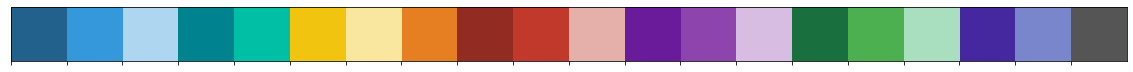

In [28]:
# create a custom color palette
palette20 = ['#21618C', '#3498DB', '#AED6F1', '#00838F', '#00BFA5',
             '#F1C40F', '#F9E79F', '#E67E22', '#922B21', '#C0392B', 
             '#E6B0AA', '#6A1B9A', '#8E44AD', '#D7BDE2', '#196F3D', 
             '#4CAF50', '#A9DFBF', '#4527A0', '#7986CB', '#555555']
sns.palplot(palette20)

Visualize the top N most common words

In [29]:
# create a word count dataframe for the top N most common words
n = 10
most_common_word = pd.DataFrame(columns = pd.DataFrame(word_counts_in_range.most_common()[:n])[0], index = range(start_day, end_day+1))

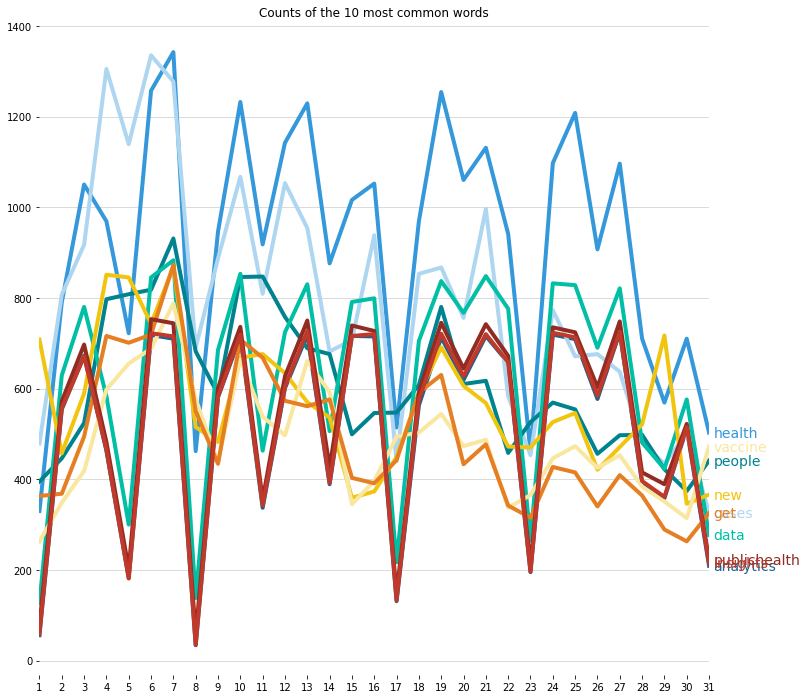

In [54]:
for word in most_common_word.columns:
  most_common_word[word] = pd.concat([final_df['day'], final_df['final_tweets'].apply(lambda x: word in x)], axis=1) \
                                      .groupby(by=['day']) \
                                      .sum()
#initialize plot
plt.figure(figsize=(12,12))

#loop through most common words
for i, word in enumerate(most_common_word.columns):
    
    #plot line
    plt.plot(range(start_day,end_day+1), 
             most_common_word[word], 
             lw=4, color=palette20[i])

    #position for the label
    y_pos = most_common_word.loc[end_day,word]
    
    #plot time series label in the same color
    plt.text(end_day+0.2, y_pos-10, word, fontsize=14, color=palette20[i])
    
#format plot
sns.despine(left=True, bottom=True)
plt.title('Counts of the 10 most common words')
plt.grid(axis='y', color='lightgray')
plt.xticks(range(start_day,end_day+1), range(start_day,end_day+1), rotation='horizontal');
plt.xlim(start_day,end_day);



## Count the number of words written per day

In [32]:
#count the number of words written each day
d = final_df.groupby(['month','day'])['final_tweets'].count().reset_index(drop=True)

#create a dataframe to contain all target word propotions
all_r = pd.DataFrame(columns=unique_words, index=d.index)

#store the document x word dataframe.
for i, word in enumerate(unique_words):
    
    all_r[word] = pd.concat([final_df.loc[:,['month','day']], 
                             final_df['final_tweets'].apply(lambda x: word in x)], 
                            axis=1) \
                    .groupby(by=['month','day']) \
                    .sum() \
                    .reset_index(drop=True)
                
    #print out a status indicator
    if np.mod(i,100)==0:
        print('word',i,'complete')
    
all_r

word 0 complete
word 100 complete
word 200 complete
word 300 complete
word 400 complete
word 500 complete
word 600 complete
word 700 complete
word 800 complete
word 900 complete
word 1000 complete
word 1100 complete
word 1200 complete
word 1300 complete
word 1400 complete
word 1500 complete
word 1600 complete
word 1700 complete
word 1800 complete
word 1900 complete
word 2000 complete
word 2100 complete
word 2200 complete
word 2300 complete
word 2400 complete
word 2500 complete
word 2600 complete
word 2700 complete
word 2800 complete
word 2900 complete
word 3000 complete
word 3100 complete
word 3200 complete
word 3300 complete
word 3400 complete
word 3500 complete
word 3600 complete
word 3700 complete
word 3800 complete
word 3900 complete
word 4000 complete
word 4100 complete
word 4200 complete
word 4300 complete
word 4400 complete
word 4500 complete
word 4600 complete
word 4700 complete
word 4800 complete
word 4900 complete
word 5000 complete
word 5100 complete
word 5200 complete
word 

,rd,way,recap,history,great,nice,watch,honest,grownup,conversation,joerogan,florida,sad,problem,getting,citizens,voting,booth,triggers,psychosis,whats,wilder,tds,rosebowl,game,maskless,folks,stands,healthcare,worker,hear,people,saying,good,vaccine,got,landed,er,thought,asthma,...,hobbspa,ucnzmaths,epooch,dumbartonsdrums,withnail,farqdoff,pbaconnect,manilas,pba,governorscup,inure,diedfromnotwith,polioday,nationalpolioday,endpolio,russiantroops,chrisgreenwald,wheekypeeg,catkeitlah,politicises,isntimho,empathizes,sohappyithurts,sohappyithurtstour,reverielove,knightowl,cleptic,fable,exoerienceceo,joethepopulist,davidjneal,commiserations,hometownmy,againshe,lacountymaskmandate,deborahanng,prahran,goyder,bluffs,pavillion
0,23,100,3,27,69,11,48,3,1,4,34,82,20,21,98,21,6,1,2,15,14,1,1,1,29,10,25,8,61,8,14,395,21,159,263,106,1,11,42,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30,96,1,19,63,23,48,5,0,2,36,38,11,27,109,25,8,0,0,23,17,0,0,2,42,4,24,4,51,2,21,446,40,136,348,119,1,6,31,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,53,115,2,21,71,10,75,18,0,6,34,101,15,29,163,35,4,0,1,6,34,0,0,0,18,12,33,9,106,6,19,524,55,129,418,168,0,9,27,7,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,36,174,1,35,92,22,87,9,0,6,16,116,33,35,239,27,2,0,1,9,29,0,0,0,32,14,32,14,160,9,42,797,56,182,598,191,3,20,56,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,68,171,1,20,91,13,80,10,0,16,26,71,29,38,209,29,7,1,2,10,28,0,1,0,47,9,44,19,134,16,42,808,69,175,655,210,2,13,63,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,61,163,2,33,96,25,81,9,0,16,19,84,37,51,254,47,10,1,2,2,37,0,0,0,57,15,44,18,155,9,50,818,64,212,688,246,0,20,59,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,43,232,1,32,141,27,92,8,0,12,20,112,27,59,275,43,6,3,3,6,47,0,2,0,40,8,62,14,160,14,64,931,83,230,788,317,2,26,80,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,37,126,0,26,91,23,69,8,0,7,17,65,30,29,176,25,14,0,1,10,28,0,0,0,45,14,30,10,118,7,28,682,64,142,577,186,3,17,38,11,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,27,126,4,15,50,11,61,5,0,6,6,37,18,30,173,18,4,1,1,6,23,0,0,0,40,10,30,10,121,6,31,587,56,129,438,152,1,13,43,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,38,176,2,32,156,22,87,8,0,17,22,110,26,45,250,52,11,1,2,5,27,0,0,0,37,45,37,9,179,13,46,846,82,170,665,255,0,20,52,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
d.head()

0     5138
1     5998
2     7801
3    10030
4     9876
Name: final_tweets, dtype: int64

In [34]:
all_r.head()

,rd,way,recap,history,great,nice,watch,honest,grownup,conversation,joerogan,florida,sad,problem,getting,citizens,voting,booth,triggers,psychosis,whats,wilder,tds,rosebowl,game,maskless,folks,stands,healthcare,worker,hear,people,saying,good,vaccine,got,landed,er,thought,asthma,...,hobbspa,ucnzmaths,epooch,dumbartonsdrums,withnail,farqdoff,pbaconnect,manilas,pba,governorscup,inure,diedfromnotwith,polioday,nationalpolioday,endpolio,russiantroops,chrisgreenwald,wheekypeeg,catkeitlah,politicises,isntimho,empathizes,sohappyithurts,sohappyithurtstour,reverielove,knightowl,cleptic,fable,exoerienceceo,joethepopulist,davidjneal,commiserations,hometownmy,againshe,lacountymaskmandate,deborahanng,prahran,goyder,bluffs,pavillion
0,23,100,3,27,69,11,48,3,1,4,34,82,20,21,98,21,6,1,2,15,14,1,1,1,29,10,25,8,61,8,14,395,21,159,263,106,1,11,42,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30,96,1,19,63,23,48,5,0,2,36,38,11,27,109,25,8,0,0,23,17,0,0,2,42,4,24,4,51,2,21,446,40,136,348,119,1,6,31,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,53,115,2,21,71,10,75,18,0,6,34,101,15,29,163,35,4,0,1,6,34,0,0,0,18,12,33,9,106,6,19,524,55,129,418,168,0,9,27,7,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,36,174,1,35,92,22,87,9,0,6,16,116,33,35,239,27,2,0,1,9,29,0,0,0,32,14,32,14,160,9,42,797,56,182,598,191,3,20,56,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,68,171,1,20,91,13,80,10,0,16,26,71,29,38,209,29,7,1,2,10,28,0,1,0,47,9,44,19,134,16,42,808,69,175,655,210,2,13,63,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Find bursts for each unique word

In [35]:
#create a dataframe to hold results
all_bursts = pd.DataFrame(columns = ['begin','end','weight'])

#define variables
s = 2       #resolution of state jumps; higher s --> fewer but stronger bursts
gam = 1     #difficulty of moving up a state; larger gamma --> harder to move up states, less bursty

n = len(d)  #number of timepoints

#loop through our flat list of unique words
for i, word in enumerate(unique_words):
    r = all_r.loc[:,word].astype(float)

  #find the optimal state sequence (using the Viterbi algorithm)
    [q,d,r,p] = bd.burst_detection(r, d, n, s, gam, smooth_win = 3)
  
  #enumerate the bursts
    bursts = bd.enumerate_bursts(q, word)

  #find weight of each burst
    bursts = bd.burst_weights(bursts, r, d, p)

  #add the bursts to a list of all bursts
    all_bursts = all_bursts.append(bursts, ignore_index = True)
    
    
  #print a progress report every 100 words
    if np.mod(i,100) == 0:
        print('word',i,'complete')

all_bursts.sort_values(by='weight', ascending=False)

word 0 complete
word 100 complete
word 200 complete
word 300 complete
word 400 complete
word 500 complete
word 600 complete
word 700 complete
word 800 complete
word 900 complete
word 1000 complete
word 1100 complete
word 1200 complete
word 1300 complete
word 1400 complete
word 1500 complete
word 1600 complete
word 1700 complete
word 1800 complete
word 1900 complete
word 2000 complete
word 2100 complete
word 2200 complete
word 2300 complete
word 2400 complete
word 2500 complete
word 2600 complete
word 2700 complete
word 2800 complete
word 2900 complete
word 3000 complete
word 3100 complete
word 3200 complete
word 3300 complete
word 3400 complete
word 3500 complete
word 3600 complete
word 3700 complete
word 3800 complete
word 3900 complete
word 4000 complete
word 4100 complete
word 4200 complete
word 4300 complete
word 4400 complete
word 4500 complete
word 4600 complete
word 4700 complete
word 4800 complete
word 4900 complete
word 5000 complete
word 5100 complete
word 5200 complete
word 

,begin,end,weight,label
2118,12,18,1036.121859,fraudsters
2259,12,18,1035.872586,hdfclife
1953,12,18,1034.469067,cheating
1397,12,18,1011.443696,advertise
328,12,18,1009.663804,licensed
...,...,...,...,...
728,2,2,3.392792,oct
662,6,6,3.390791,adamschiff
752,10,10,3.390559,battle
15,26,26,3.38014,chronic


## Visualize the top 100 bursting topics

Text(0.5, 1.0, 'Timeline of the top 100 "bursting" topics in the Twitter data stream')

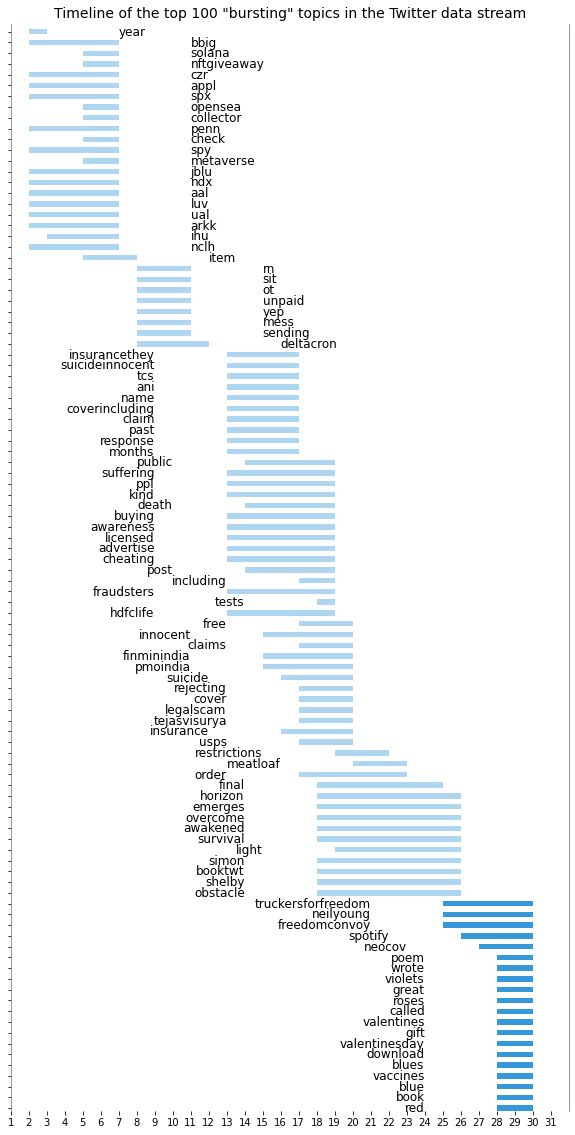

In [51]:
#plot only the n biggest bursts
n_bursts = 100
top_bursts = all_bursts.sort_values(by='weight', ascending=False).reset_index(drop=True).loc[:n_bursts,:]

#sort bursts by end date
sorted_bursts = top_bursts.sort_values('end', ascending=False).reset_index(drop=True)
#for bursts that end at the last timepoint, sort by start point
last_timepoint = np.max(sorted_bursts['end'])
sorted_bursts.loc[sorted_bursts['end']==last_timepoint,:] = sorted_bursts.loc[sorted_bursts['end']==last_timepoint,:] \
                                                                         .sort_values(by='begin', ascending=False) \
                                                                         .reset_index(drop=True)
    
#format bars
bar_width = 0.5                                 #width of bars
bar_pos = np.array(range(len(sorted_bursts)))   #positions of top edge of bars
ylabel_pos = bar_pos + (bar_width/2)            #y axis label positions
n = len(d)                                      #number of time points

#initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 20))

#plot current bursts in blue and old bursts in plate blue
sorted_bursts['color'] = '#AED6F1' #blue
sorted_bursts.loc[sorted_bursts['end']==last_timepoint,'color'] = blog_blue

#plot the end points
end_bars = ax.barh(bar_pos, sorted_bursts.loc[:,'end'], bar_width, align='edge', 
        color=sorted_bursts['color'], edgecolor='none')

#plot the start points (in white to blend in with the background)
start_bars = ax.barh(bar_pos, sorted_bursts.loc[:,'begin'], bar_width, align='edge', 
        color='w', edgecolor='none')

#label each burst
plt.yticks(ylabel_pos, '') #remove default labels
for burst in range(len(sorted_bursts)):
    width = int(end_bars[burst].get_width())
    #place label on right side for early bursts
    if width <= (n/2):
        plt.text(width+4, ylabel_pos[burst], sorted_bursts.loc[burst,'label'],
                fontsize=12, va='center')
    #place label on left side for late bursts
    else:
        width = int(start_bars[burst].get_width())
        plt.text(width-4, ylabel_pos[burst], sorted_bursts.loc[burst,'label'],
                fontsize=12, va='center', ha='right')
        
#format plot
ax.set(xlim=(0, n), ylim=(0,n_bursts+1), ylabel='', xlabel='')
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_color([0.5, 0.5, 0.5])    
ax.spines["right"].set_color([0.5, 0.5, 0.5])

plt.xticks(range(0, n), range(1, 32), rotation='horizontal')

ax.set_title('Timeline of the top ' + str(n_bursts) +' "bursting" topics in the Twitter data stream', size=14)

## Normalize proportions of bursting topics over time

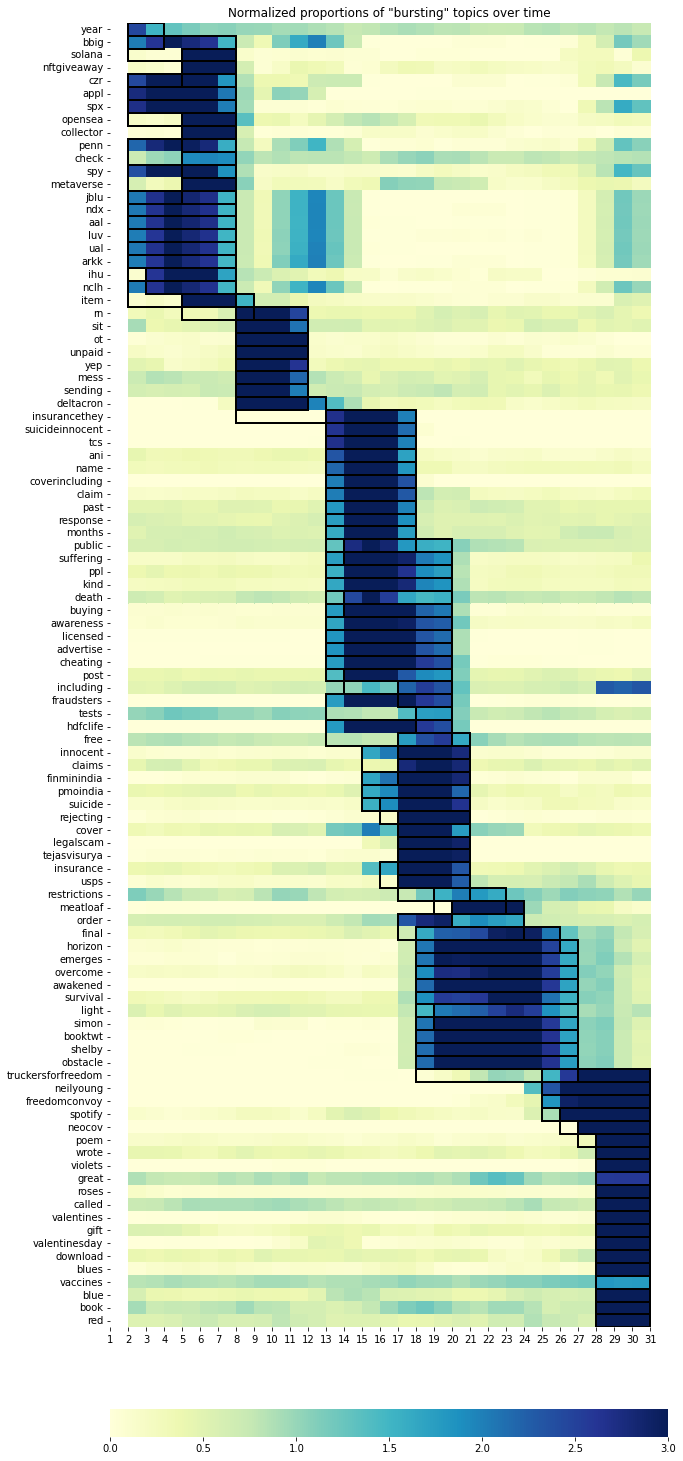

In [50]:
#create a heatmap of p vs. time for the bursting words

#pull out the r values that will be displayed
heatmap_tweets = all_r.loc[:,set(sorted_bursts['label'])]

#find the baseline proportions sum(r)/sum(d) for each label
baseline_p = heatmap_tweets.sum(axis=0) / d.sum()

#convert r values into proportions at each timepoint
heatmap_tweets = heatmap_tweets.apply(lambda x: x/d)

#sort the rows according to the order used in the timeline
order = sorted_bursts['label'].drop_duplicates(keep='last').values
#transpose data and reindex the data according to the sorted word order
heatmap_tweets = heatmap_tweets.T.reindex(order)

#optional: demean proportions
#heatmap_data = heatmap_data - heatmap_data.mean(axis=1)

#optional: convert proportions into multiples of the baseline proportion
heatmap_tweets = heatmap_tweets.apply(lambda x: x/baseline_p[x.index])

#smooth proportions with the same smoothing window used in burst detection
smoothed_heatmap_tweets = heatmap_tweets.rolling(window=3, center=True, axis=1).mean()

#create the heatmap
plt.figure(figsize=(10,30))
ax = sns.heatmap(smoothed_heatmap_tweets[::-1], vmin=0, vmax=3, cmap="YlGnBu", yticklabels=True, annot=False, fmt=".2g",
                 cbar_kws = dict(use_gridspec=False, location="bottom", pad=0.05, shrink=1))
plt.title('Normalized proportions of "bursting" topics over time')
plt.xticks(range(0, n), range(1, 32), rotation='horizontal')

#create boxes around bursting periods
for index, burst in sorted_bursts.iterrows():
        
    #define outline positions
    y = smoothed_heatmap_tweets.index.get_loc(burst['label'])
    y = len(smoothed_heatmap_tweets) - y - 1  #reverse since it counts from bottom
    xstart = burst['begin'] 
    width = burst['end'] - burst['begin'] + 1
    
    #draw rectangle
    ax.add_patch(plt.Rectangle((xstart,y), width, height=2, alpha=1, fill = True,
                           facecolor='none', edgecolor='k', linewidth=2))


## Find words in baseline state

In [38]:
#find words with upward trends
#create a dataframe to hold the slopes of the word counts
word_trends = pd.DataFrame(columns=['m','baseline_prop'], index=unique_words)

#last n months
period_start = pd.Timestamp('2022-01-01')

#denote which months to include in the analysis
days_index = final_df.groupby(by=['Dates']).count().reset_index()['Dates']
days = days_index >= period_start

#loop through words
for word in unique_words:
    
    #pull out proportion of titles with WORD throughout the whole time period
    word_trends.loc[word,'baseline_prop'] = np.sum(all_r[days][word]) / np.sum(d[days])

    #find the proporitions of titles with WORD for each month 
    prop =  all_r[days][word] / d[days]
    
    #normalize the proportions 
    norm_prop = prop / word_trends.loc[word,'baseline_prop']

    #find the slope of the proportions over time by taking the line of best fit
    word_trends.loc[word,'m'] = stats.linregress(range(sum(days)),norm_prop)[0]

word_trends.sort_values(by='m', ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



,m,baseline_prop
thehavokdotcom,0.295082,0.000008
yaakov,0.295082,0.000004
regale,0.295082,0.000004
charteramendments,0.295082,0.000004
byronyork,0.295082,0.000008
vjanjana,0.295082,0.000004
joebidenleadermcconnell,0.295082,0.000004
saikate,0.295082,0.000008
marita,0.295082,0.000004
skijumping,0.295082,0.000004


## Visualize words with the steepest upwards trends over time

In [39]:
#visualize the time courses of the top trending words
top_n = 10      #number of words to include in the plot
win = 11        #width of smoothing window for plotting; 1 for no smoothing

#pull out the top trending words and their slopes
#only use words with a baseline proportion of at least 0.01
trending_words_p = word_trends.loc[word_trends['baseline_prop']>0.004,:]

#select top n words with steepest slopes
top_words = trending_words_p.sort_values(by='m', ascending=False).iloc[0:top_n,:]

In [ ]:
p

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8     0.014766
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
dtype: float64

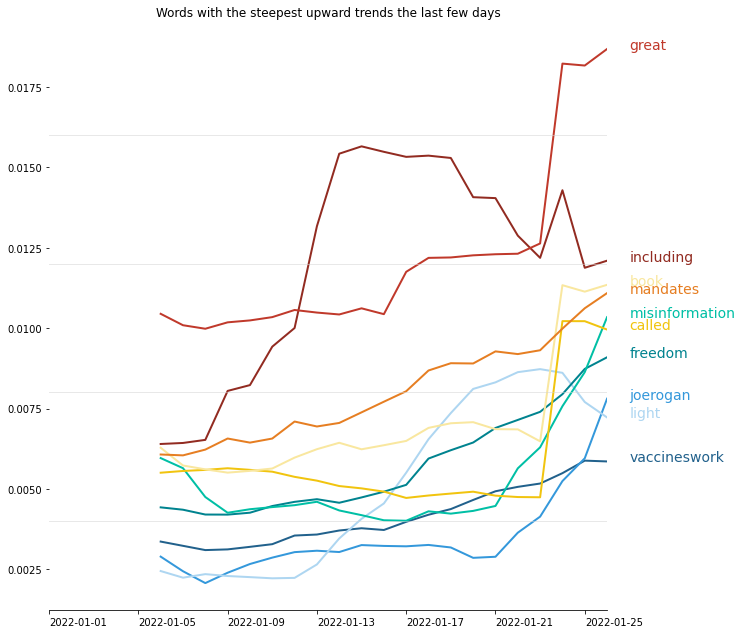

In [49]:
#set up the plot
fig, ax = plt.subplots(figsize=(10, 12))  
  
#plot time series of trending words
for pos, word in enumerate(top_words.sort_values(by='baseline_prop').index):
    
    #calculate p
    p = all_r.loc[:,word]/d
    
    #smooth p to aid visualization
    p = p.rolling(window=win, center=True).mean()

    #plot time series
    plt.plot(days_index[days], p[days].values,lw=2, color=palette20[pos])   
    
    #define the position for the label
    y_pos = p[~np.isnan(p)][-1:] #final proportion
    x_pos = ax.get_xlim()[1]     #right of plot
 
   
    plt.text(x_pos, y_pos, word, fontsize=14, color=palette20[pos])  
    
    #add a title
plt.title('Words with the steepest upward trends the last few days')

#remove left axis
sns.despine(left=True)

#restrict the x axis to the smoothed window
ax.set_xlim(period_start,(days_index[-1:]-pd.DateOffset(days=(win-1)//2)).values)
#format the xticks
plt.gcf().autofmt_xdate(rotation='horizontal', ha='left')

#add horizontal gridlines
for y in np.arange(0.004,ax.get_ylim()[1],0.004):
    plt.axhline(y, color='lightgray', linestyle='-', linewidth=1, alpha=0.5)